In [23]:
## Dependencies
import pandas as pd
import numpy as np
import nbconvert
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import ks_2samp
from scipy.stats import chisquare


In [2]:
## Read file
filename = "C:/Users/justi/OneDrive/Desktop/Analytics/Amazon_Vine_Analysis/vine_table.csv"
vine_table = pd.read_csv(filename)

In [3]:
vine_table.head()

,review_id,star_rating,helpful_votes,total_votes,vine,verified_purchase
0,REAKC26P07MDN,5,0,0,N,Y
1,R3NU7OMZ4HQIEG,2,0,1,N,Y
2,R14QJW3XF8QO1P,5,0,0,N,Y
3,R2HB7AX0394ZGY,5,0,0,N,Y
4,RGKMPDQGSAHR3,5,0,0,N,Y


In [4]:
# First filter for 20 or more votes
vine_df = vine_table[vine_table.total_votes >= 20]
vine_df.head()

,review_id,star_rating,helpful_votes,total_votes,vine,verified_purchase
128,R21KC552Y6HL8X,1,27,31,N,Y
161,RX9WC9FTIR1XR,5,25,25,N,Y
256,RGDCOU1KBHMNG,3,29,31,N,Y
267,RVTYWID2TPMMY,2,35,42,N,Y
719,R2CMPZ5VESGRLY,4,27,28,N,Y


In [5]:
vine_df.dtypes

review_id            object
star_rating           int64
helpful_votes         int64
total_votes           int64
vine                 object
verified_purchase    object
dtype: object

In [6]:
# Second filter to find products where helpful votes are at least 50% of total
helpful = vine_df[(vine_df.helpful_votes/vine_df.total_votes) >= 0.5]

In [7]:
# Filter the data into 2 dfs with paid vine users and unpaid users
paid = helpful[helpful.vine == 'Y']
unpaid = helpful[helpful.vine == 'N']

In [8]:
# Create a function that can return the total number of reviews, number of 5-star reviews and percentage of 5-star reviews for users
def calculate_reviews(df, rating=5, helpful='helpful'):
    total = df.review_id.count()
    fives = df.star_rating[df.star_rating == rating].count()
    percent = fives/total * 100
    
    if df.iloc[0,4] == "N":
        payment = "unpaid"
    else:
        payment = "paid vine"

    return (f'Out of {total:,} reviews, there were {fives:,} {rating}-star reviews. The percent of {helpful} {rating}-star reviews by {payment} users was {percent:.2f}%')


In [9]:
# Display the vine users for pet products
calculate_reviews(paid)

'Out of 170 reviews, there were 65 5-star reviews. The percent of helpful 5-star reviews by paid vine users was 38.24%'

In [10]:
# Display the unpaid users for pet products
calculate_reviews(unpaid)

'Out of 37,823 reviews, there were 20,605 5-star reviews. The percent of helpful 5-star reviews by unpaid users was 54.48%'

In [11]:
# Further Analysis
# unhelpful reviewers
unhelpful = vine_df[(vine_df.helpful_votes/vine_df.total_votes) < 0.5]
u_paid = unhelpful[unhelpful.vine == 'Y']
u_unpaid = unhelpful[unhelpful.vine == 'N']
(calculate_reviews(u_paid, helpful='unhelpful'),
 calculate_reviews(u_unpaid, helpful='unhelpful'))

('Out of 2 reviews, there were 0 5-star reviews. The percent of unhelpful 5-star reviews by paid vine users was 0.00%',
 'Out of 1,364 reviews, there were 120 5-star reviews. The percent of unhelpful 5-star reviews by unpaid users was 8.80%')

In [12]:
# Further Analysis
# Helpful 4-star
(calculate_reviews(paid, 4), calculate_reviews(unpaid, 4))

('Out of 170 reviews, there were 56 4-star reviews. The percent of helpful 4-star reviews by paid vine users was 32.94%',
 'Out of 37,823 reviews, there were 4,897 4-star reviews. The percent of helpful 4-star reviews by unpaid users was 12.95%')

In [13]:
# Helpful 3-star
(calculate_reviews(paid, 3), calculate_reviews(unpaid, 3))

('Out of 170 reviews, there were 27 3-star reviews. The percent of helpful 3-star reviews by paid vine users was 15.88%',
 'Out of 37,823 reviews, there were 2,710 3-star reviews. The percent of helpful 3-star reviews by unpaid users was 7.16%')

In [14]:
# Helpful 2-star
(calculate_reviews(paid, 2), calculate_reviews(unpaid, 2))

('Out of 170 reviews, there were 16 2-star reviews. The percent of helpful 2-star reviews by paid vine users was 9.41%',
 'Out of 37,823 reviews, there were 2,048 2-star reviews. The percent of helpful 2-star reviews by unpaid users was 5.41%')

In [15]:
# Helpful 1-star
(calculate_reviews(paid, 1), calculate_reviews(unpaid, 1))

('Out of 170 reviews, there were 6 1-star reviews. The percent of helpful 1-star reviews by paid vine users was 3.53%',
 'Out of 37,823 reviews, there were 7,563 1-star reviews. The percent of helpful 1-star reviews by unpaid users was 20.00%')

In [16]:
def distribute_reviews(df, helpful='helpful'):
    total = df.review_id.count()
    fives = df.star_rating[df.star_rating == 5].count()
    fours = df.star_rating[df.star_rating == 4].count()
    threes = df.star_rating[df.star_rating == 3].count()
    twos = df.star_rating[df.star_rating == 2].count()
    ones = df.star_rating[df.star_rating == 1].count()

    return [fives/total, fours/total, threes/total, twos/total, ones/total]

In [17]:
paid_dist = distribute_reviews(paid)
unpaid_dist = distribute_reviews(unpaid)
x_labels = ["5", "4", "3", "2", "1"]

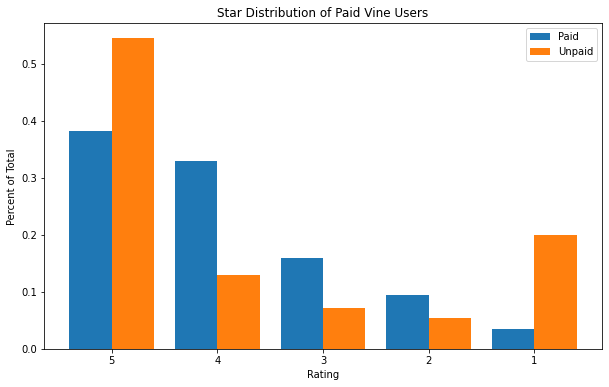

In [18]:
plt.subplots(figsize=(10,6))

x_axis = np.arange(len(x_labels))
plt.bar(x_axis + 0.8, paid_dist, 0.4, label = "Paid")
plt.bar(x_axis + 1.2, unpaid_dist, 0.4, label = "Unpaid")

plt.title("Star Distribution of Paid Vine Users")
plt.xlabel("Rating")
plt.xticks([1, 2, 3, 4, 5], x_labels)
plt.ylabel("Percent of Total")
plt.legend()
plt.show()

In [25]:
# Performing a Kolmogorov-Smirnov Test
# The KS Test shows the equality of continuous or discontinuous 1-D probability distributions to compare (in this case) 2 samples, answering whether 2 samples could have come from the same data distribution. 
ks_2samp(unpaid_dist, paid_dist)


KstestResult(statistic=0.8, pvalue=0.07936507936507936)

In [20]:
paid_dist = distribute_reviews(u_paid)
unpaid_dist = distribute_reviews(u_unpaid)
x_labels = ["5", "4", "3", "2", "1"]


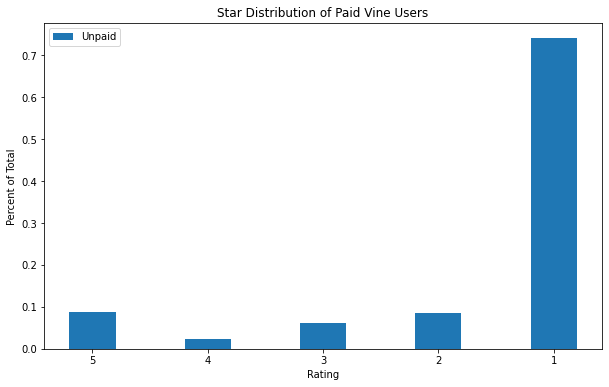

In [21]:
plt.subplots(figsize=(10, 6))

x_axis = np.arange(len(x_labels))
plt.bar(x_axis + 1, unpaid_dist, 0.4, label="Unpaid")

plt.title("Star Distribution of Paid Vine Users")
plt.xlabel("Rating")
plt.xticks([1, 2, 3, 4, 5], x_labels)
plt.ylabel("Percent of Total")
plt.legend()
plt.show()


In [22]:
# Unhelpful 1-star reviews
# Helpful 1-star
(calculate_reviews(u_paid, 1, helpful="unhelpful"), calculate_reviews(u_unpaid, 1, helpful="unhelpful"))

('Out of 2 reviews, there were 2 1-star reviews. The percent of unhelpful 1-star reviews by paid vine users was 100.00%',
 'Out of 1,364 reviews, there were 1,010 1-star reviews. The percent of unhelpful 1-star reviews by unpaid users was 74.05%')